In [24]:
import pandas as pd
import sklearn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import rfpimp
from rfpimp import *

Dataframe from MDA_merge_data.ipynb is loaded, datetime column is dropped in order to run model.

In [4]:
df = pd.read_csv("C:/Users/saaan/Downloads/MDA_dataframeArthur.csv")
df_nd = df.drop('result_timestamp', axis=1)

In [5]:
# Drop the datetime column
df_nd = df.drop('result_timestamp', axis=1)

The target dataset (y) and predictor dataset (X) are created. For y, noise is converted to relative noise (proportion of max value)

In [6]:
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [7]:
#convert noise to relative noise (or relative crowdedness) as target (y), create dataframe with predictors only (X)
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [8]:
#create time-sensitive split for cross-validation
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=4320,
    max_train_size=10000,
    test_size=1000,
)

In [10]:
#inspect splits
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
32951,14,4,19,8,0,52.0,15.73,32.0,437.0,0.0,0.0,-8.0,0.08,373.0,26.25,26.25,26.193,25.146406
32952,14,4,19,8,0,50.0,15.36,32.0,469.0,0.0,0.0,171.0,0.02,230.0,26.53,26.53,26.473,25.640656
32953,14,4,19,8,0,50.0,15.61,31.0,470.0,0.0,0.0,143.0,0.36,228.0,27.05,27.05,26.993,26.296341
32954,14,4,19,8,0,50.0,15.90,32.0,269.0,0.0,0.0,105.0,0.39,297.0,27.31,27.31,27.253,26.501806
32955,14,4,19,8,0,51.0,16.22,31.0,187.0,0.0,0.0,144.0,0.07,397.0,27.32,27.32,27.263,26.213027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42946,2,4,28,10,0,91.0,13.00,38.0,0.0,0.0,0.0,0.0,0.00,0.0,14.39,14.39,14.333,14.198870
42947,2,4,28,10,0,90.0,12.83,37.0,0.0,0.0,0.0,-102.0,0.00,0.0,14.39,14.39,14.333,14.185340
42948,2,4,28,10,0,90.0,12.78,38.0,0.0,0.0,0.0,0.0,0.00,0.0,14.39,14.39,14.333,14.206740
42949,2,4,28,10,0,90.0,12.78,37.0,0.0,0.0,0.0,-92.0,0.04,0.0,14.39,14.39,14.333,14.314940


In [11]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
36951,9,4,16,9,0,84.0,13.90,32.0,163.0,0.0,0.0,59.0,0.03,117.0,16.59,16.59,16.533,16.339917
36952,9,4,16,9,0,82.0,13.60,32.0,210.0,0.0,0.0,-172.0,0.02,127.0,16.78,16.78,16.723,16.384344
36953,9,4,16,9,0,79.0,13.46,31.0,165.0,0.0,0.0,98.0,0.04,134.0,17.07,17.07,17.013,16.527561
36954,9,4,16,9,0,79.0,13.63,32.0,144.0,0.0,0.0,-6.0,0.03,139.0,17.31,17.31,17.253,16.762182
36955,9,4,16,9,0,80.0,14.00,32.0,142.0,0.0,0.0,27.0,0.02,161.0,17.49,17.49,17.433,16.968314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46946,23,3,24,11,0,86.0,6.88,37.0,0.0,0.0,0.0,-81.0,0.12,0.0,9.11,9.11,9.053,9.123540
46947,23,3,24,11,0,86.0,6.92,38.0,0.0,0.0,0.0,26.0,0.03,0.0,9.17,9.17,9.113,9.154146
46948,23,3,24,11,0,85.0,6.81,37.0,0.0,0.0,0.0,36.0,0.21,0.0,9.22,9.22,9.163,9.262167
46949,23,3,24,11,0,85.0,6.78,38.0,0.0,0.0,0.0,78.0,0.13,0.0,9.22,9.22,9.163,9.232913


In [12]:
# grid search for hyperparameter tuning

param_grid = {
    'learning_rate': (0.01, 0.02, 0.03, 0.04),
    'n_estimators': (50, 60, 70),
    'max_depth' : (2, 3, 4)}
model = xgb.XGBRegressor()
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=ts_cv)
model_grid_search.fit(X, y)


GridSearchCV(cv=TimeSeriesSplit(gap=4320, max_train_size=10000, n_splits=5, test_size=1000),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
  

In [13]:
accuracy = model_grid_search.score(X, y)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.67


In [15]:
model_grid_search.predict(X.iloc[0:5])

array([0.5043593, 0.5043593, 0.5043593, 0.5043593, 0.5043593],
      dtype=float32)

In [16]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 50}


In [17]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.854309,0.074970,0.008195,0.002637,0.04,3,50,"{'learning_rate': 0.04, 'max_depth': 3, 'n_est...",0.747586,0.710229,0.778161,0.735180,0.411909,0.676613,0.134148,1
23,1.402598,0.147417,0.009395,0.001743,0.03,3,70,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.750179,0.711439,0.779576,0.740867,0.391499,0.674712,0.143267,2
22,0.958049,0.107764,0.007796,0.002637,0.03,3,60,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.728866,0.677461,0.773320,0.720910,0.464184,0.672948,0.108724,3
25,4.397276,3.416382,0.011393,0.001743,0.03,4,60,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",0.730759,0.636822,0.788645,0.734121,0.454735,0.669017,0.117741,4
33,0.937462,0.131980,0.006795,0.001166,0.04,4,50,"{'learning_rate': 0.04, 'max_depth': 4, 'n_est...",0.745249,0.672210,0.792677,0.746591,0.388255,0.668996,0.145574,5


In [18]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [19]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,param_learning_rate,param_n_estimators,param_max_depth,mean_test_score,std_test_score,rank_test_score
30,0.04,50,3,0.676613,0.134148,1
23,0.03,70,3,0.674712,0.143267,2
22,0.03,60,3,0.672948,0.108724,3
25,0.03,60,4,0.669017,0.117741,4
33,0.04,50,4,0.668996,0.145574,5
31,0.04,60,3,0.667247,0.171685,6
26,0.03,70,4,0.666498,0.155249,7
34,0.04,60,4,0.653746,0.188336,8
21,0.03,50,3,0.650416,0.069870,9
24,0.03,50,4,0.648378,0.085329,10


In [20]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["param_learning_rate"],
    columns=["param_n_estimators"])

pivoted_cv_results

param_n_estimators,50,60,70
param_learning_rate,,,
0.01,-0.100650,0.071941,0.208476
0.02,0.473671,0.565558,0.618274
0.03,0.635417,0.658770,0.660292
0.04,0.661729,0.652414,0.632947


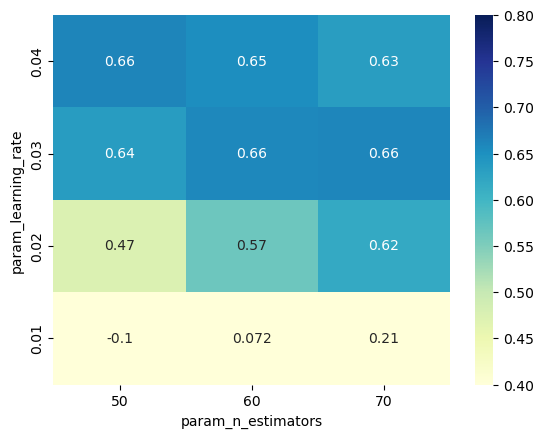

In [21]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.4,
                 vmax=0.8)
ax.invert_yaxis()

In [32]:
#run XGBoost model
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

gbrt_pipeline = make_pipeline(xgb.XGBRegressor(learning_rate=0.03,n_estimators=70,max_depth=3)).set_output(transform="pandas")

evaluate(gbrt_pipeline, X, y, cv=ts_cv)

AttributeError: 'Pipeline' object has no attribute 'set_output'

In [37]:
#tijdelijk omdat de cell hierboven niet werkt voor mij
regressor=xgb.XGBRegressor(learning_rate = model_grid_search.best_params_["learning_rate"],
                           n_estimators  = model_grid_search.best_params_["n_estimators"],
                           max_depth     = model_grid_search.best_params_["max_depth"],
                           eval_metric='rmse')

evaluate(regressor,X,y, cv=ts_cv)

regressor.fit(X,y)



Mean Absolute Error:     0.034 +/- 0.007
Root Mean Squared Error: 0.043 +/- 0.008


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

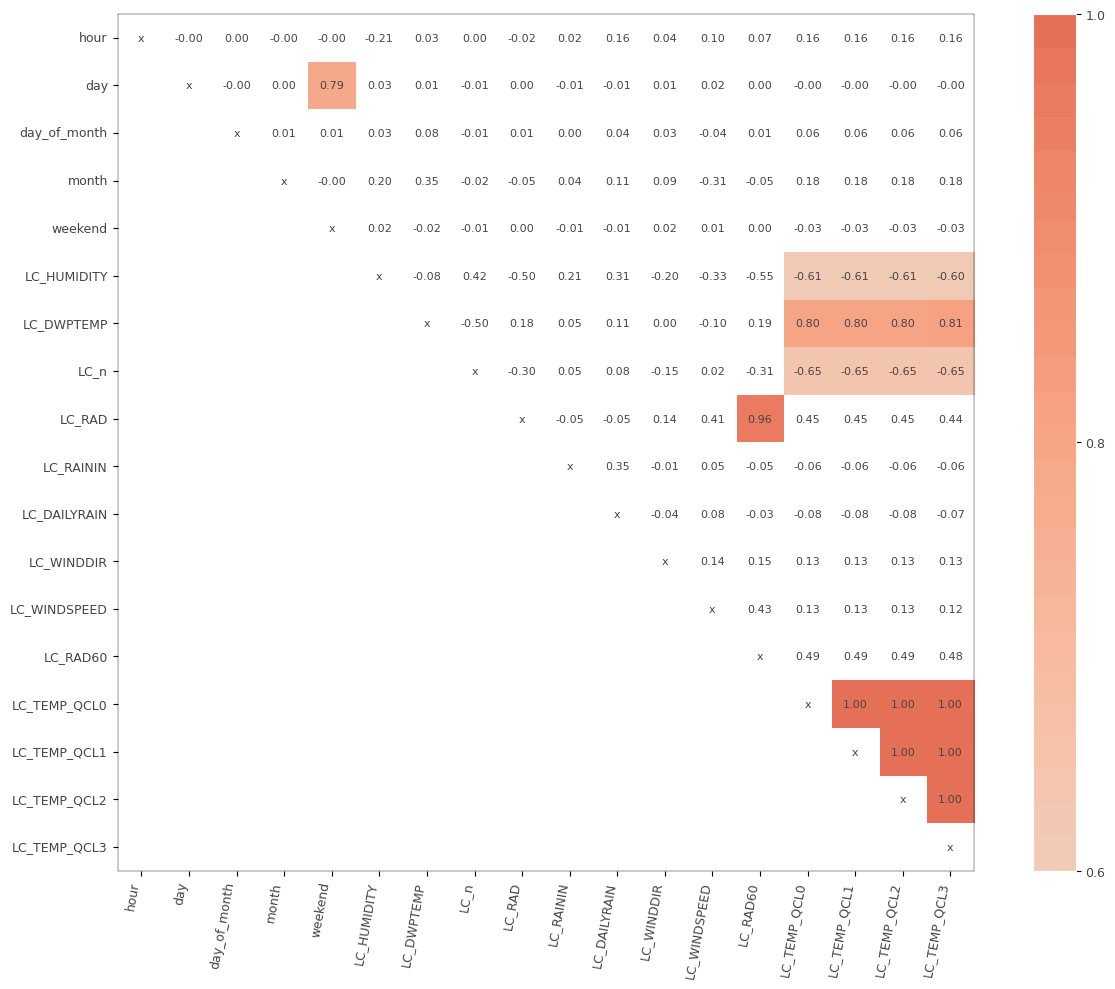

In [34]:
#feature importance adjusted 
#first check correlation matrix=Spearman's rank-order correlation: I still have to verify if we shouldn't just use a normal correlation matrix
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X, figsize=(15,10))
viz.view()

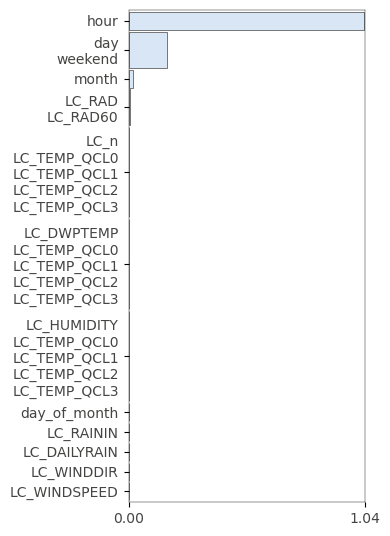

In [39]:
#problem: we should fit this on the validation set i think
#check this later
features=['hour',['day','weekend'],'day_of_month','month',['LC_HUMIDITY','LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3'],
['LC_DWPTEMP','LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3'],
['LC_n','LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3'],
['LC_RAD','LC_RAD60'],
'LC_RAININ','LC_DAILYRAIN','LC_WINDDIR','LC_WINDSPEED']
imp = importances(regressor, X, y, features=features) # permutation
#should be on fitted model. I used the X and y but usualy you would need to use the validation set
viz = plot_importances(imp)
viz.view()

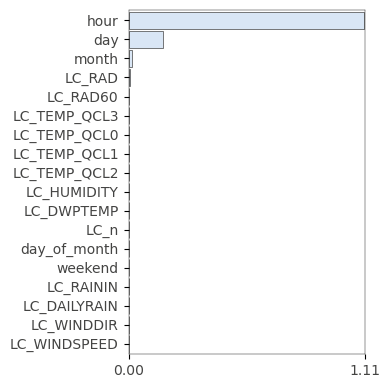

In [40]:
#now do the same but look at variables separately: 
# the feature importance should be lower, because dropping a variable form the model 
# will not result in a large decrease of information gain, etc if the other correlated variables take over the task of explaining the model 
#example: you can see that weekend is not as important anymore, because day takes over if weekend is in the model
features=['hour','day','weekend','day_of_month','month','LC_HUMIDITY','LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3',
'LC_DWPTEMP',
'LC_n',
'LC_RAD','LC_RAD60',
'LC_RAININ','LC_DAILYRAIN','LC_WINDDIR','LC_WINDSPEED']
imp = importances(regressor, X, y, features=features) # permutation
#should be on fitted model. I used the X and y but usualy you would need to use the validation set
viz = plot_importances(imp)
viz.view()


In [28]:
#feature importance
xgb_reg = xgb.XGBRegressor(learning_rate=0.03,n_estimators=70,max_depth=3, importance_type='gain').fit(X,y)
xgb_reg.get_booster().get_score(importance_type='gain')


{'hour': 14.245830535888672,
 'day': 3.299513339996338,
 'day_of_month': 0.11976116895675659,
 'month': 1.2487311363220215,
 'LC_HUMIDITY': 0.4806499481201172,
 'LC_RAD': 2.493515729904175,
 'LC_RAD60': 1.246988296508789,
 'LC_TEMP_QCL0': 0.7294268608093262,
 'LC_TEMP_QCL3': 0.6696067452430725}

In [29]:
weight = xgb_reg.get_booster().get_score(importance_type='weight')
gain = xgb_reg.get_booster().get_score(importance_type='gain')
cover = xgb_reg.get_booster().get_score(importance_type='cover')
total_gain = xgb_reg.get_booster().get_score(importance_type='total_gain')
total_cover = xgb_reg.get_booster().get_score(importance_type='total_cover')

f_importance_weight = xgb_reg.get_booster().get_score(importance_type='weight')
importance_df_weight = pd.DataFrame.from_dict(data=f_importance_weight, 
                                       orient='index')
f_importance_gain = xgb_reg.get_booster().get_score(importance_type='gain')
importance_df_gain = pd.DataFrame.from_dict(data=f_importance_gain, 
                                       orient='index')
f_importance_cover = xgb_reg.get_booster().get_score(importance_type='cover')
importance_df_cover = pd.DataFrame.from_dict(data=f_importance_cover, 
                                       orient='index')
f_importance_total_gain = xgb_reg.get_booster().get_score(importance_type='total_gain')
importance_df_total_gain = pd.DataFrame.from_dict(data=f_importance_total_gain, 
                                       orient='index')
f_importance_total_cover = xgb_reg.get_booster().get_score(importance_type='total_cover')
importance_df_total_cover = pd.DataFrame.from_dict(data=f_importance_total_cover, 
                                       orient='index')

feature_importance = pd.concat([importance_df_weight, importance_df_gain, importance_df_cover, importance_df_total_gain, importance_df_total_cover], axis=1)
feature_importance

,0,0,0,0,0
hour,283.0,14.245831,24673.732422,4031.570068,6982666.0
day,125.0,3.299513,22473.119141,412.439178,2809140.0
day_of_month,1.0,0.119761,1392.000000,0.119761,1392.0
month,58.0,1.248731,12202.500000,72.426407,707745.0
LC_HUMIDITY,1.0,0.480650,30504.000000,0.480650,30504.0
LC_RAD,10.0,2.493516,28158.599609,24.935158,281586.0
LC_RAD60,2.0,1.246988,33604.000000,2.493977,67208.0
LC_TEMP_QCL0,1.0,0.729427,8701.000000,0.729427,8701.0
LC_TEMP_QCL3,9.0,0.669607,9774.222656,6.026461,87968.0
